### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [ ]:
data = pd.read_csv('data/coupons.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns', None)
data.head(100)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,21,Single,0,Associates degree,Student,$12500 - $24999,NaN,1~3,less1,1~3,less1,1~3,1,1,0,0,1,1
96,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,0,Associates degree,Student,$12500 - $24999,NaN,1~3,less1,1~3,less1,1~3,1,0,0,0,1,1
97,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,21,Single,0,Associates degree,Student,$12500 - $24999,NaN,1~3,less1,1~3,less1,1~3,1,1,0,0,1,1
98,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,21,Single,0,Associates degree,Student,$12500 - $24999,NaN,1~3,less1,1~3,less1,1~3,1,0,0,0,1,1


2. Investigate the dataset for missing or problematic data.

In [ ]:
data.describe(include='all')

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684,12684,12684,12684.000000,12684,12684,12684,12684,12684,12684,12684.000000,12684,12684,12684,108,12577,12467,12533,12554,12495,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,NaN,5,5,2,2,8,5,NaN,6,25,9,5,5,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,6PM,Coffee House,1d,Female,21,Married partner,NaN,Some college - no degree,Unemployed,$25000 - $37499,Scooter and motorcycle,never,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,NaN,3230,3996,7091,6511,2653,5100,NaN,4351,1870,2013,22,5197,3385,4672,5376,6077,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,63.301798,NaN,NaN,NaN,NaN,NaN,NaN,0.414144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,19.154486,NaN,NaN,NaN,NaN,NaN,NaN,0.492593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
# Find how many unique occurences are there with how many times it appears in the data
for column in data.columns:
    print(data[column].value_counts())

destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64
passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64
weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64
temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64
time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64
expiration
1d    7091
2h    5593
Name: count, dtype: int64
gender
Female    6511
Male      6173
Name: count, dtype: int64
age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64
maritalStatus
Married partner      5100
Single               4752
Unmarri

<Axes: >

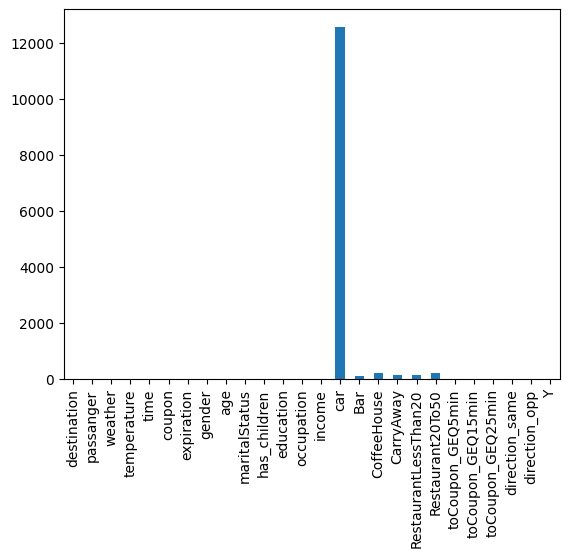

In [ ]:
# find missing dataset and plot it
(data.isna().sum()).plot(kind='bar')

In [ ]:
data.groupby('car',dropna=False).size()

,0
car,
Car that is too old to install Onstar :D,21
Mazda5,22
Scooter and motorcycle,22
crossover,21
do not drive,22
NaN,12576


<Axes: xlabel='car,Y'>

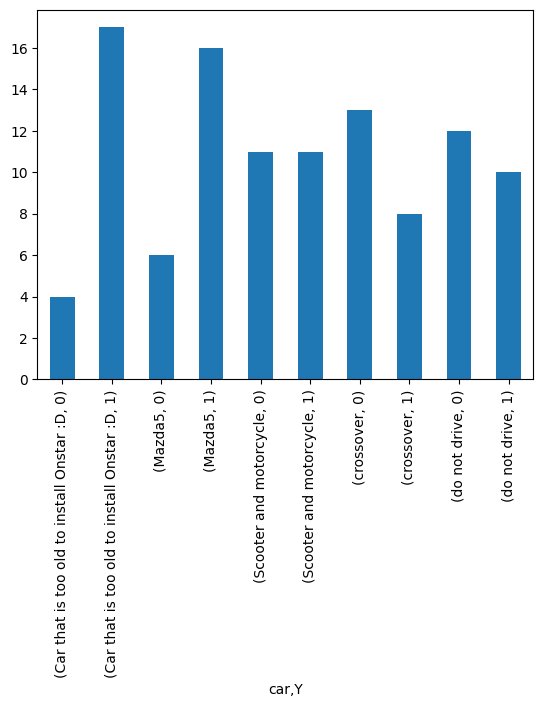

In [ ]:
# let's plot car variable against final one to understand
data.groupby(['car','Y']).size().plot(kind='bar')

In [ ]:
# Let's use correlation to understand the relationship of car with target vaiable Y. Since Car is categorical variable, we need to encode the values to muneric to find correlation

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['car_encoded'] = le.fit_transform(data['car'])
data[['car_encoded','Y']].corr()

,car_encoded,Y
car_encoded,1.000000,-0.012771
Y,-0.012771,1.000000


3. Decide what to do about your missing data -- drop, replace, other...

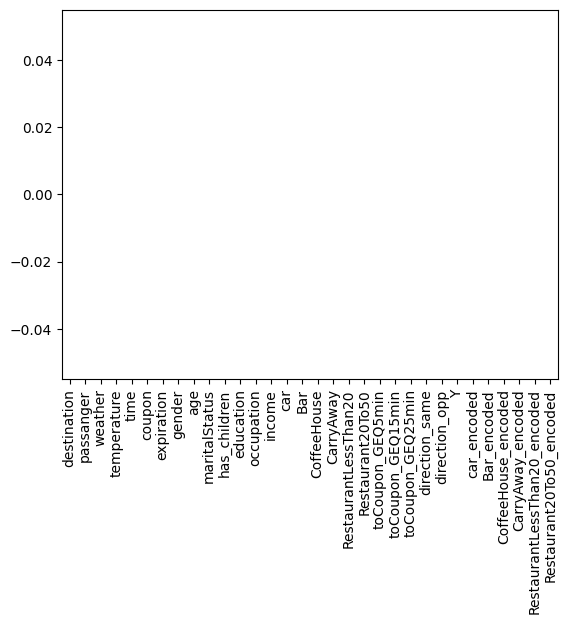

In [ ]:
# from the correlation above, it appears that car relationship is very close to 0 to target variable Y. So let's fill in null values with Unknown.

data['car'].fillna('Unknown',inplace=True);
(data.isna().sum()).plot(kind='bar');

In [ ]:
# Looks like weak relationship of Bar with target variable
data.groupby('Bar',dropna=False).size()
le = LabelEncoder()
data['Bar_encoded'] = le.fit_transform(data['Bar'])
data[['Bar_encoded','Y']].corr()

,Bar_encoded,Y
Bar_encoded,1.000000,-0.074921
Y,-0.074921,1.000000


In [ ]:
# Looks like weak relationship of CoffeeHouse with target variable
data.groupby('CoffeeHouse',dropna=False).size()
le = LabelEncoder()
data['CoffeeHouse_encoded'] = le.fit_transform(data['CoffeeHouse'])
data[['CoffeeHouse_encoded','Y']].corr()

,CoffeeHouse_encoded,Y
CoffeeHouse_encoded,1.000000,-0.140943
Y,-0.140943,1.000000


In [ ]:
# Looks like weak relationship of CarryAway with target variable
data.groupby('CarryAway',dropna=False).size()
le = LabelEncoder()
data['CarryAway_encoded'] = le.fit_transform(data['CarryAway'])
data[['CarryAway_encoded','Y']].corr()

,CarryAway_encoded,Y
CarryAway_encoded,1.000000,-0.045577
Y,-0.045577,1.000000


In [ ]:
# Looks like weak relationship of RestaurantLessThan20 with target variable
data.groupby('RestaurantLessThan20',dropna=False).size()
le = LabelEncoder()
data['RestaurantLessThan20_encoded'] = le.fit_transform(data['RestaurantLessThan20'])
data[['RestaurantLessThan20_encoded','Y']].corr()

,RestaurantLessThan20_encoded,Y
RestaurantLessThan20_encoded,1.000000,-0.007917
Y,-0.007917,1.000000


In [ ]:
# Looks like weak relationship of Restaurant20To50 with target variable
data.groupby('Restaurant20To50',dropna=False).size()
le = LabelEncoder()
data['Restaurant20To50_encoded'] = le.fit_transform(data['Restaurant20To50'])
data[['Restaurant20To50_encoded','Y']].corr()

,Restaurant20To50_encoded,Y
Restaurant20To50_encoded,1.000000,-0.055288
Y,-0.055288,1.000000


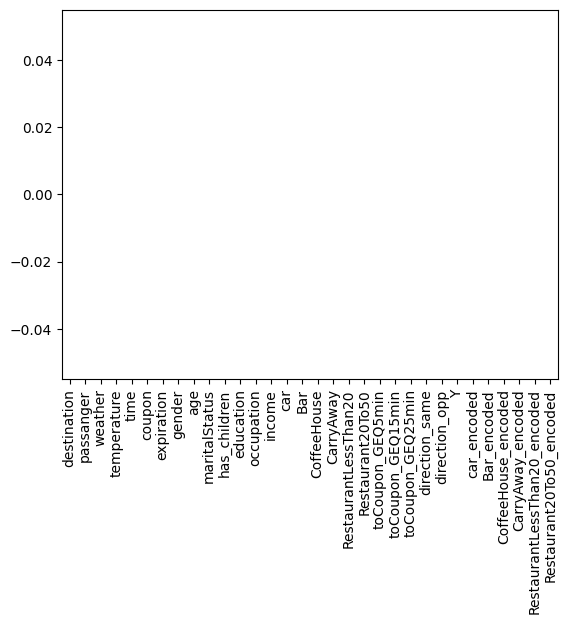

In [ ]:
# Let's fill in missing values with Unknown to make sure that we have a seperate category that Model may need to understand. If we use one of the most
# frequently occuring, then it might introduce bias in the model.

data['Bar'].fillna('Unknown');
data['CoffeeHouse'].fillna('Unknown');
data['CarryAway'].fillna('Unknown');
data['RestaurantLessThan20'].fillna('Unknown');
data['Restaurant20To50'].fillna('Unknown');
(data.isna().sum()).plot(kind='bar');
# Looks like we have handled all the missing values for now. Since we have used Unknown for categorical values, we may anytime overwrite it with another
# value or frequently occuring value if needed.


4. What proportion of the total observations chose to accept the coupon?



In [ ]:
# No of people who chose to accept the coupon
people_accepted_coupon = data[data['Y']==1].shape[0]
print(people_accepted_coupon)


7210


5. Use a bar plot to visualize the `coupon` column.

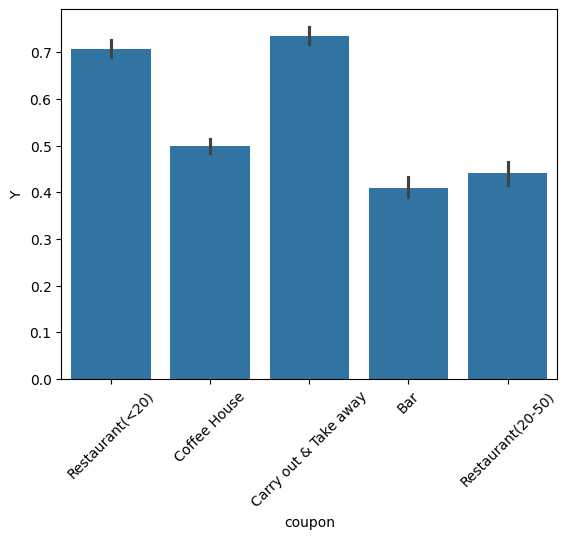

In [ ]:
sns.barplot(x=data['coupon'], y=data['Y'])
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

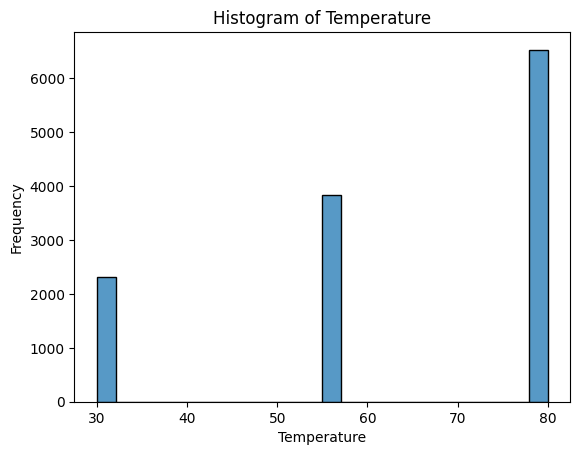

In [ ]:
sns.histplot(data['temperature']);
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [ ]:
data.groupby('Bar',dropna=False).size()
bar_coupons = data[data['Bar'] != 'never']
bar_coupons.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,car_encoded,Bar_encoded,CoffeeHouse_encoded,CarryAway_encoded,RestaurantLessThan20_encoded,Restaurant20To50_encoded
66,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,46,Married partner,1,Bachelors degree,Education&Training&Library,$75000 - $87499,Unknown,less1,1~3,1~3,1~3,less1,1,0,0,0,1,1,5,4,0,0,0,4
67,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,46,Married partner,1,Bachelors degree,Education&Training&Library,$75000 - $87499,Unknown,less1,1~3,1~3,1~3,less1,1,0,0,0,1,1,5,4,0,0,0,4
68,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,46,Married partner,1,Bachelors degree,Education&Training&Library,$75000 - $87499,Unknown,less1,1~3,1~3,1~3,less1,1,1,0,0,1,1,5,4,0,0,0,4
69,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,46,Married partner,1,Bachelors degree,Education&Training&Library,$75000 - $87499,Unknown,less1,1~3,1~3,1~3,less1,1,1,0,0,1,1,5,4,0,0,0,4
70,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,46,Married partner,1,Bachelors degree,Education&Training&Library,$75000 - $87499,Unknown,less1,1~3,1~3,1~3,less1,1,1,0,0,1,1,5,4,0,0,0,4
71,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,46,Married partner,1,Bachelors degree,Education&Training&Library,$75000 - $87499,Unknown,less1,1~3,1~3,1~3,less1,1,1,0,0,1,1,5,4,0,0,0,4
72,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,46,Married partner,1,Bachelors degree,Education&Training&Library,$75000 - $87499,Unknown,less1,1~3,1~3,1~3,less1,1,1,0,0,1,1,5,4,0,0,0,4
73,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Male,46,Married partner,1,Bachelors degree,Education&Training&Library,$75000 - $87499,Unknown,less1,1~3,1~3,1~3,less1,1,1,0,0,1,1,5,4,0,0,0,4
74,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Male,46,Married partner,1,Bachelors degree,Education&Training&Library,$75000 - $87499,Unknown,less1,1~3,1~3,1~3,less1,1,1,0,0,1,1,5,4,0,0,0,4
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,1,Bachelors degree,Education&Training&Library,$75000 - $87499,Unknown,less1,1~3,1~3,1~3,less1,1,1,0,0,1,1,5,4,0,0,0,4


2. What proportion of bar coupons were accepted?


In [ ]:
#no of times coupons were accepted
no_of_times_accepted = bar_coupons[bar_coupons['Y']==1].shape[0]
total_no_of_times = bar_coupons.shape[0]
no_of_times = no_of_times_accepted/total_no_of_times
print('Portion of coupons accepted',round(no_of_times,2))

Portion of coupons accepted 0.59


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [ ]:
# print(bar_coupons['Bar'].unique());
bar_coupons.loc[:,'bar_frequency_group'] = bar_coupons['Bar'].apply(lambda x: '<3'if x in ('less1','1~3') else '>3');

acceptance_rate_less_3 = round(bar_coupons[bar_coupons['bar_frequency_group'] == '<3']['Y'].mean(),2)
acceptance_rate_more_3 = round(bar_coupons[bar_coupons['bar_frequency_group'] == '>3']['Y'].mean(),2)

# print(bar_coupons['bar_frequency_group'].value_counts());
# acceptance_rate_less_3 = round(bar_coupons['bar_frequency_group'].value_counts()['<3']/bar_coupons['bar_frequency_group'].count(),2);
# acceptance_rate_more_3 = round(bar_coupons['bar_frequency_group'].value_counts()['>3']/bar_coupons['bar_frequency_group'].count(),2);
print("Acceptance rate for who went to a bar 3 or fewer times a month", acceptance_rate_less_3, "VS Acceptance rate for who went to a bar more than 3 times a month", acceptance_rate_more_3);

# The acceptance rate for people who go to bar less than 3 times a month is very close to people who go to bar more than 3 times a month

Acceptance rate for who went to a bar 3 or fewer times a month 0.59 VS Acceptance rate for who went to a bar more than 3 times a month 0.61


In [ ]:
# Cleanup the age column. It has string values for age 50plus and below21. If you don't write lamdba, it will keep giving errors.
bar_coupons['age'].unique()
bar_coupons.loc[:,'age'] = bar_coupons['age'].apply(lambda x: x.replace('50plus','50').replace('below21','20') if isinstance(x,str) else x)
bar_coupons['age'].unique()
# bar_coupons.loc[:,'age'] = bar_coupons['age'].str.replace('50plus','50').str.replace('below21','20')
bar_coupons.loc[:,'age'] = pd.to_numeric(bar_coupons['age'], errors='coerce')
bar_coupons['age'].unique()

array([46, 21, 26, 31, 50, 41, 36, 20], dtype=object)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [ ]:
# Compare the acceptance rate
# print(bar_coupons['Bar'].unique());
bar_coupons.loc[:,'bar_frequency_group_once'] = bar_coupons.apply(lambda x: 'less1' if (x['Bar'] in ['less1'] and x['age'] > 25) else '>1', axis=1)

acceptance_rate_bar_25 = round(bar_coupons[bar_coupons['bar_frequency_group_once'] == 'less1']['Y'].mean(),2)
acceptance_rate_bar_others = round(bar_coupons[bar_coupons['bar_frequency_group_once'] == '>1']['Y'].mean(),2)
print("Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25 is ",acceptance_rate_bar_25, "VS Otheres ", acceptance_rate_bar_others)

# acceptance_rate_bar_25 = round(bar_coupons['bar_frequency_group_once'].value_counts()['less1']/bar_coupons['bar_frequency_group_once'].value_counts()['>1'],2)


Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25 is  0.55 VS Otheres  0.62


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [ ]:
bar_coupons.loc[:,'bar_frequency_group'] = bar_coupons.apply(lambda x: '>1' if (x['Bar'] in ['less1'] and x['passanger'] != 'Kid(s)' and x['occupation'] not in ('farming','fishing','forestry')) else 'Others', axis=1)
acceptance_rate_bar = round(bar_coupons[bar_coupons["bar_frequency_group"] == '>1']['Y'].mean(),2)
# acceptance_rate_bar = round(bar_coupons['bar_frequency_group'].value_counts()['>1']/bar_coupons['bar_frequency_group'].value_counts()['Others'],2)

print("Acceptance rate is ",acceptance_rate_bar)

Acceptance rate is  0.57


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [ ]:
condition_1 = (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) & bar_coupons['passanger'] != 'Kid(s)') & (bar_coupons['maritalStatus'] != 'Widowed')
condition_2 = (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) & bar_coupons['age'] < 30)
condition_3 = (bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8']) & bar_coupons['income'] < 50000)

all_filters= condition_1 | condition_2 | condition_3

subset_data = bar_coupons[all_filters]

acceptance_rate = round(subset_data['Y'].mean(),2)
print("Acceptance rate is ",acceptance_rate)


Acceptance rate is  0.59


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
# Based on data analysis, the hypothesis is that hose drivers who:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
# go to bars more than once a month and are under the age of 30 OR
# go to cheap restaurants more than 4 times a month and income is less than 50K
# are likely to accept bar coupons

In [ ]:
# for column in data.columns:
#     print(data[column].value_counts())
data.describe(include='all')

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,car_encoded,Bar_encoded,CoffeeHouse_encoded,CarryAway_encoded,RestaurantLessThan20_encoded,Restaurant20To50_encoded
count,12684,12684,12684,12684.000000,12684,12684,12684,12684,12684,12684,12684.000000,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,NaN,5,5,2,2,8,5,NaN,6,25,9,6,6,6,6,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,6PM,Coffee House,1d,Female,21,Married partner,NaN,Some college - no degree,Unemployed,$25000 - $37499,Unknown,never,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,NaN,3230,3996,7091,6511,2653,5100,NaN,4351,1870,2013,12576,5197,3385,4672,5376,6077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,63.301798,NaN,NaN,NaN,NaN,NaN,NaN,0.414144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433,4.974535,3.330968,2.672737,1.382135,1.353437,2.908073
std,NaN,NaN,NaN,19.154486,NaN,NaN,NaN,NaN,NaN,NaN,0.492593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314,0.304086,1.976536,1.990527,1.499002,1.573918,1.929630
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000,5.000000,4.000000,4.000000,1.000000,1.000000,4.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000,5.000000,5.000000,4.000000,3.000000,3.000000,4.000000



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

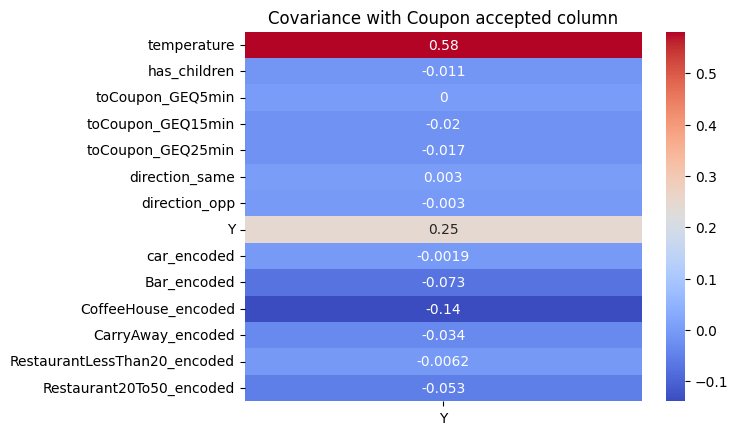

In [ ]:
# It appears that temperature plays an important role. When temperature is high, the coupon gets accepted.

cov_matrix = data.cov(numeric_only=True)
target_cov = cov_matrix[['Y']]
sns.heatmap(target_cov, annot=True, cmap='coolwarm')
plt.title('Covariance with Coupon accepted column')
plt.show()


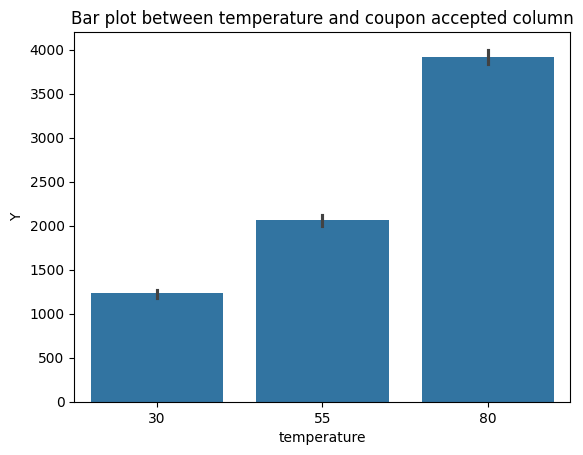

In [ ]:
# # Let's plot scatter plot between temperature and coupon accepted column
sns.barplot(data=data, x='temperature', y='Y', estimator =sum)
plt.title('Bar plot between temperature and coupon accepted column')
plt.show()